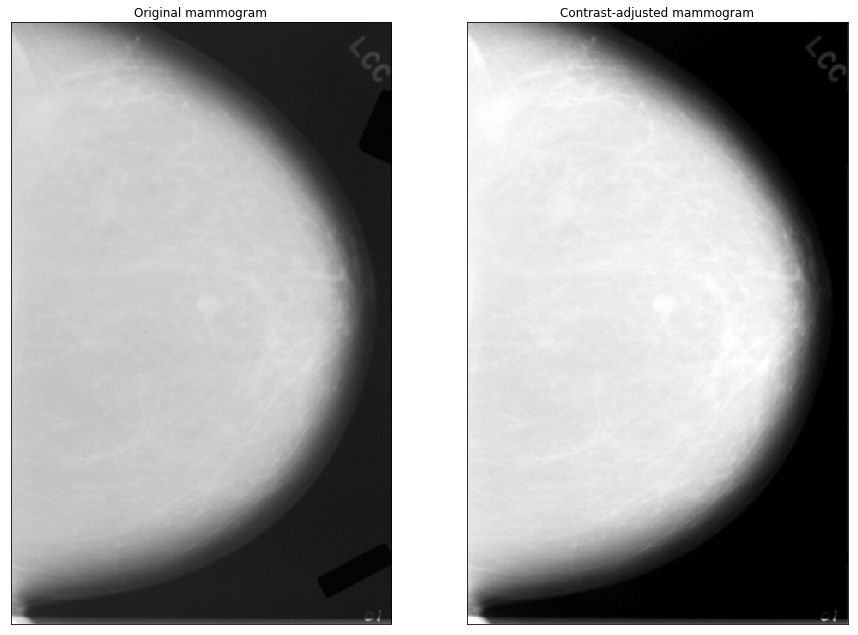

In [12]:
#task 1

%matplotlib inline
import cv2
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pylab as pylab
from matplotlib import pyplot as plt

pylab.rcParams['figure.figsize'] = (15.0, 15.0)

img = cv2.imread('mammogram1.png',0)

# Convert to signed 16-bit integer to allow values outside of the (0,255) range
cimg = np.int16(img)  

# YOUR CODE HERE
cimg = img 
# END OF YOUR CODE
gain= 1.5 #contrst 
bias= -80 #brightness

cimg=img*gain+bias
cimg=np.clip(cimg,0,255)
# Convert back to uint8 values
cimg = np.uint8(cimg)

plt.subplot(121), plt.imshow(img, cmap = 'gray')
plt.title('Original mammogram'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cimg, cmap = 'gray')
plt.title('Contrast-adjusted mammogram'), plt.xticks([]), plt.yticks([])
plt.show()

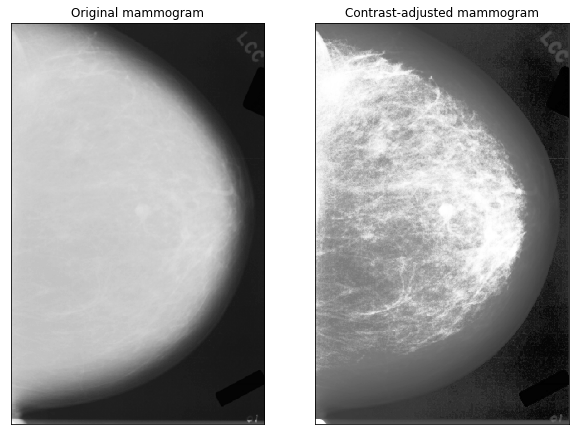

In [18]:
##Task 2-1
import cv2
import numpy as np
from matplotlib import pyplot as plt

pylab.rcParams['figure.figsize'] = (10.0, 10.0)
img = cv2.imread('mammogram1.png',0)

# YOUR CODE HERE
#equ = img

equ=cv2.equalizeHist(img)

# END OF YOUR CODE

plt.subplot(121), plt.imshow(img, cmap = 'gray')
plt.title('Original mammogram'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(equ, cmap = 'gray')
plt.title('Contrast-adjusted mammogram'), plt.xticks([]), plt.yticks([])
plt.show()


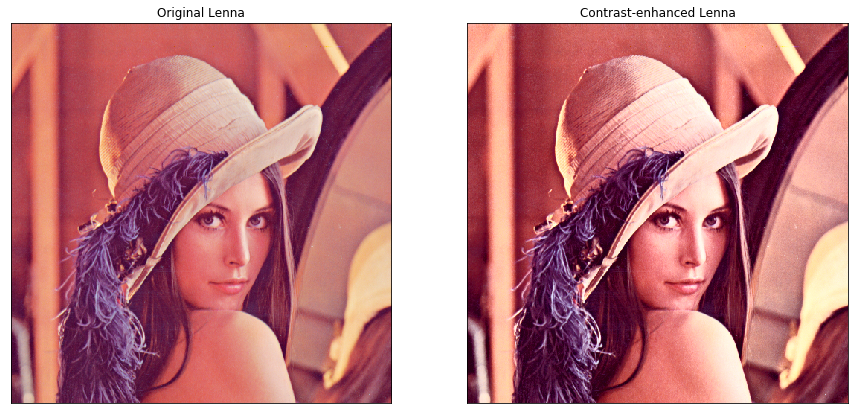

In [131]:
##Task 2-2
##Reference: https://stackoverflow.com/questions/31998428/opencv-python-equalizehist-colored-image
import cv2
import numpy as np
from matplotlib import pyplot as plt

pylab.rcParams['figure.figsize'] = (15.0, 15.0)
img = cv2.imread('Lenna.png')

# YOUR CODE HERE
#equ = img
equ=cv2.cvtColor(img,cv2.COLOR_BGR2YCrCb)
# just take the Y
# equalize the histogram of the Y channel
equ[:,:,0]=cv2.equalizeHist(equ[:,:,0]) # histogram of gray image equalized
equ = cv2.cvtColor(equ, cv2.COLOR_YCrCb2BGR)


# END OF YOUR CODE

plt.subplot(121), plt.imshow(img[:,:,::-1])
plt.title('Original Lenna'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(equ[:,:,::-1])
plt.title('Contrast-enhanced Lenna'), plt.xticks([]), plt.yticks([])
plt.show()

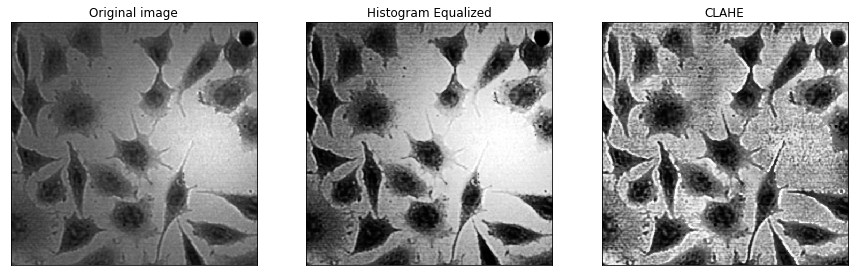

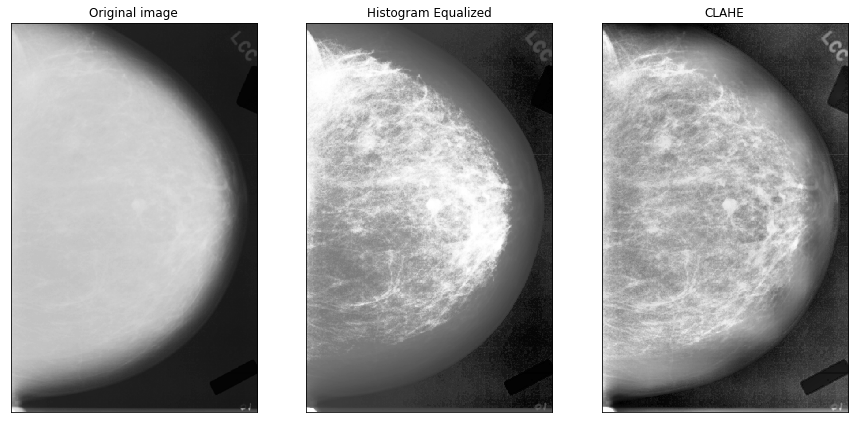

In [60]:
##Task 2-3
import cv2
import numpy as np
from matplotlib import pyplot as plt

pylab.rcParams['figure.figsize'] = (15.0, 15.0)
img1 = cv2.imread('cell.png', 0)
img2 = cv2.imread('mammogram1.png', 0)

# YOUR CODE HERE
#img1_clahe = img1_equalized = img1
#img2_clahe = img2_equalized = img2
img1_equalized=cv2.equalizeHist(img1)
img2_equalized=cv2.equalizeHist(img2)

clahe=cv2.createCLAHE(clipLimit=8.0, tileGridSize=(8,8))
img1_clahe= clahe.apply(img1)
img2_clahe= clahe.apply(img2)

# END OF YOUR CODE

plt.subplot(131), plt.imshow(img1, cmap = 'gray')
plt.title('Original image'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(img1_equalized, cmap = 'gray')
plt.title('Histogram Equalized'), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(img1_clahe, cmap = 'gray')
plt.title('CLAHE'), plt.xticks([]), plt.yticks([])
plt.show()

plt.subplot(131), plt.imshow(img2, cmap = 'gray')
plt.title('Original image'), plt.xticks([]), plt.yticks([])

plt.subplot(132), plt.imshow(img2_equalized, cmap = 'gray')
plt.title('Histogram Equalized'), plt.xticks([]), plt.yticks([])

plt.subplot(133), plt.imshow(img2_clahe, cmap = 'gray')
plt.title('CLAHE'), plt.xticks([]), plt.yticks([])
plt.show()

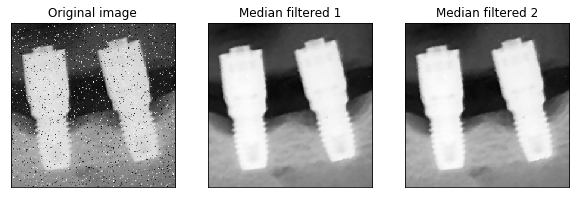

In [134]:
##Task 3-1 Salt and pepper noise
##reference: http://scipy-lectures.org/advanced/image_processing/auto_examples/plot_denoising.html
import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy import ndimage

pylab.rcParams['figure.figsize'] = (10.0, 10.0)
img = cv2.imread('screw.png',0)

# YOUR CODE HERE
#img_filtered = img
img_filtered1 = ndimage.median_filter(img,5)
img_filtered2 = cv2.medianBlur(img,5)

# END OF YOUR CODE

plt.imshow(img, cmap = 'gray')

plt.subplot(131), plt.imshow(img, cmap = 'gray')
plt.title('Original image'), plt.xticks([]), plt.yticks([])

plt.subplot(132), plt.imshow(img_filtered1, cmap = 'gray')
plt.title('Median filtered 1'), plt.xticks([]), plt.yticks([])

plt.subplot(133), plt.imshow(img_filtered2, cmap = 'gray')
plt.title('Median filtered 2'), plt.xticks([]), plt.yticks([])

plt.show()

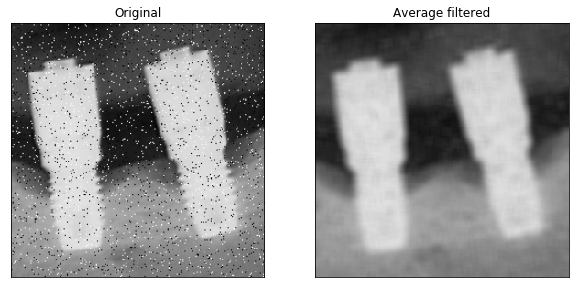

In [81]:
##Task 3-2 Gaussian noise
#reference: 
#https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_filtering/py_filtering.html
import cv2
import numpy as np
from matplotlib import pyplot as plt

pylab.rcParams['figure.figsize'] = (10.0, 10.0)
img = mpimg.imread('screw.png')

# YOUR CODE HERE
#img_filtered = img
kernel = np.ones((5,5),np.float32)/25 #number increases, get blurrier image,but less noise
img_filtered = cv2.filter2D(img,-1,kernel)

# END OF YOUR CODE

plt.subplot(121), plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_filtered),plt.title('Average filtered')
plt.xticks([]), plt.yticks([])
plt.show()

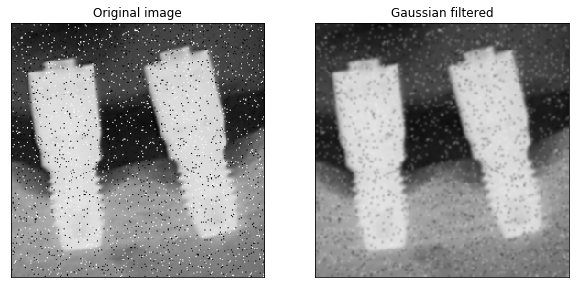

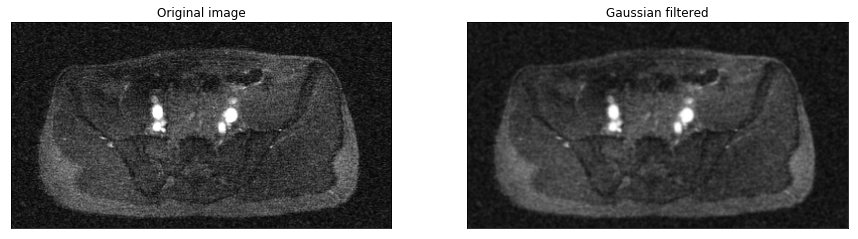

In [135]:
##Task 3-2 Gaussian blurring
import cv2
import numpy as np
from matplotlib import pyplot as plt

pylab.rcParams['figure.figsize'] = (10.0, 10.0)
img1 = mpimg.imread('screw.png')
img2 = mpimg.imread('mri_noise.png')

# YOUR CODE HERE

#img1_filtered = img1
#img2_filtered = img2
img1_filtered  = cv2.GaussianBlur(img1,(5,5),0) #ksize should be odd number.
img2_filtered  = cv2.GaussianBlur(img2,(9,9),0)
# The result with Gaussian blur look better than with those obtained from simple averaging filtering

# END OF YOUR CODE

plt.imshow(img1, cmap = 'gray')
plt.subplot(121), plt.imshow(img1, cmap = 'gray')
plt.title('Original image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img1_filtered, cmap = 'gray')
plt.title('Gaussian filtered'), plt.xticks([]), plt.yticks([])
plt.show()
pylab.rcParams['figure.figsize'] = (15.0, 15.0)
plt.imshow(img2, cmap = 'gray')
plt.subplot(121), plt.imshow(img2, cmap = 'gray')
plt.title('Original image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img2_filtered, cmap = 'gray')
plt.title('Gaussian filtered'), plt.xticks([]), plt.yticks([])
plt.show()

In [125]:
##Task 3-2  Non-Local Means Denoising
##can't run
import cv2
import numpy as np
from matplotlib import pyplot as plt

pylab.rcParams['figure.figsize'] = (10.0, 10.0)
img = mpimg.imread('mri_noise.png')
#cimg = np.int8(img)  
# YOUR CODE HERE
#img_filtered = img

img_filtered= cv2.fastNlMeansDenoising(img,None,3,7,21) #img,None,10,7,21

# END OF YOUR CODE
plt.subplot(121), plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_filtered),plt.title('Non-Local Means Denoising')
plt.xticks([]), plt.yticks([])
plt.show()

error: OpenCV(4.0.0) /Users/travis/build/skvark/opencv-python/opencv/modules/photo/src/denoising.cpp:142: error: (-5:Bad argument) Unsupported depth! Only CV_8U is supported for NORM_L2 in function 'fastNlMeansDenoising'
